In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("A_year_of_pizza_sales_from_a_pizza_place_872_68.csv")   

In [3]:
df

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...,...
49569,49570,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [4]:
df.isnull().sum()

Unnamed: 0    0
X             0
id            0
date          0
time          0
name          0
size          0
type          0
price         0
dtype: int64

In [5]:
df = df.drop( columns = ["Unnamed: 0", "X"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  object 
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [7]:
df["time"] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [8]:
df

,id,date,time,name,size,type,price
0,2015-000001,2015-01-01,2015-01-01 11:38:36,hawaiian,M,classic,13.25
1,2015-000002,2015-01-01,2015-01-01 11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,2015-01-01,2015-01-01 11:57:40,mexicana,M,veggie,16.00
3,2015-000002,2015-01-01,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,2015-01-01,2015-01-01 11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...
49569,2015-021348,2015-12-31,2015-12-31 21:23:10,four_cheese,L,veggie,17.95
49570,2015-021348,2015-12-31,2015-12-31 21:23:10,napolitana,S,classic,12.00
49571,2015-021348,2015-12-31,2015-12-31 21:23:10,ckn_alfredo,M,chicken,16.75
49572,2015-021349,2015-12-31,2015-12-31 22:09:54,mexicana,L,veggie,20.25


In [9]:
df = df.drop(columns = ["date"])

In [10]:
df["weekday nº"] = df['time'].dt.weekday

In [11]:
df['time_of_the_day'] = df['time'].dt.hour
time_bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']
df['session'] = pd.cut(df['time_of_the_day'], bins=time_bins, labels=labels, include_lowest=True, right=False)

In [12]:
#Count of Pizza Orders per Month
df['month'] = df['time'].dt.month

In [13]:
order_counts_month = df.groupby(['month']).size().reset_index(name='order_count')
print(order_counts_month)

    month  order_count
0       1         4232
1       2         3961
2       3         4261
3       4         4151
4       5         4328
5       6         4107
6       7         4392
7       8         4168
8       9         3890
9      10         3883
10     11         4266
11     12         3935


In [14]:
order_counts_week = df.groupby(['weekday nº']).size().reset_index(name='order_count')
print(order_counts_week)

   weekday nº  order_count
0           0         6485
1           1         6895
2           2         6946
3           3         7478
4           4         8242
5           5         7493
6           6         6035


In [15]:
df.head()

,id,time,name,size,type,price,weekday nº,time_of_the_day,session,month
0,2015-000001,2015-01-01 11:38:36,hawaiian,M,classic,13.25,3,11,Morning,1
1,2015-000002,2015-01-01 11:57:40,classic_dlx,M,classic,16.00,3,11,Morning,1
2,2015-000002,2015-01-01 11:57:40,mexicana,M,veggie,16.00,3,11,Morning,1
3,2015-000002,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75,3,11,Morning,1
4,2015-000002,2015-01-01 11:57:40,five_cheese,L,veggie,18.50,3,11,Morning,1


In [16]:
grouped_session = df.groupby(['month','weekday nº','session'])
session_data = pd.DataFrame(grouped_session['id'].count())

C:\Users\hajar\AppData\Local\Temp\ipykernel_2192\817994986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_session = df.groupby(['month','weekday nº','session'])


In [17]:
unique_sessions = df[['month','weekday nº', 'session']].drop_duplicates()

# Count 'id' values based on 'session'
session_counts = df.groupby(['month','weekday nº','session'])['id'].count().reset_index(name='orders')

# Merge the count back into the unique sessions DataFrame
session_data = unique_sessions.merge(session_counts, on=['month','weekday nº','session'])

session_data

C:\Users\hajar\AppData\Local\Temp\ipykernel_2192\142959197.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  session_counts = df.groupby(['month','weekday nº','session'])['id'].count().reset_index(name='orders')


,month,weekday nº,session,orders
0,1,3,Morning,30
1,1,3,Noon,366
2,1,3,Evening,260
3,1,3,Night,79
4,1,4,Morning,49
...,...,...,...,...
327,12,0,Morning,37
328,12,0,Noon,216
329,12,0,Evening,190
330,12,0,Night,70


In [18]:
df.groupby(['month','weekday nº','session'])['id'].count().reset_index(name='count')

C:\Users\hajar\AppData\Local\Temp\ipykernel_2192\3678704180.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['month','weekday nº','session'])['id'].count().reset_index(name='count')


,month,weekday nº,session,count
0,1,0,Late Night,0
1,1,0,Early Morning,0
2,1,0,Morning,32
3,1,0,Noon,228
4,1,0,Evening,202
...,...,...,...,...
499,12,6,Early Morning,0
500,12,6,Morning,11
501,12,6,Noon,201
502,12,6,Evening,222


## Using Prophet to model time series

In [19]:
df.head()

,id,time,name,size,type,price,weekday nº,time_of_the_day,session,month
0,2015-000001,2015-01-01 11:38:36,hawaiian,M,classic,13.25,3,11,Morning,1
1,2015-000002,2015-01-01 11:57:40,classic_dlx,M,classic,16.00,3,11,Morning,1
2,2015-000002,2015-01-01 11:57:40,mexicana,M,veggie,16.00,3,11,Morning,1
3,2015-000002,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75,3,11,Morning,1
4,2015-000002,2015-01-01 11:57:40,five_cheese,L,veggie,18.50,3,11,Morning,1


In [20]:
df['date'] = df['time'].dt.date

In [21]:
yr_dates = pd.DataFrame(df['date'].drop_duplicates())

# Count 'id' values based on 'session'
date_orders = pd.DataFrame(df.groupby(['date'])['id'].count().reset_index(name='orders'))

# Merge the count back into the unique sessions DataFrame
prophet_days = yr_dates.merge(date_orders, on=['date'])

In [22]:
prophet_days.columns = ['ds','y']
prophet_days

,ds,y
0,2015-01-01,162
1,2015-01-02,165
2,2015-01-03,158
3,2015-01-04,106
4,2015-01-05,125
...,...,...
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82


In [23]:
from prophet import Prophet

In [24]:
m = Prophet()
m.add_seasonality('yearly', period=365, fourier_order=2, mode='multiplicative')
m.fit(prophet_days)

14:41:19 - cmdstanpy - INFO - Chain [1] start processing
14:41:19 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
718,2016-12-26
719,2016-12-27
720,2016-12-28
721,2016-12-29
722,2016-12-30


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
718,2016-12-26,115.846916,90.484893,140.730627
719,2016-12-27,112.860656,87.009732,139.561492
720,2016-12-28,113.661529,88.126396,139.062388
721,2016-12-29,123.670725,97.464600,148.895186
722,2016-12-30,144.242473,119.053731,170.648712


## Monthly modelling

In [27]:
df.head()

,id,time,name,size,type,price,weekday nº,time_of_the_day,session,month,date
0,2015-000001,2015-01-01 11:38:36,hawaiian,M,classic,13.25,3,11,Morning,1,2015-01-01
1,2015-000002,2015-01-01 11:57:40,classic_dlx,M,classic,16.00,3,11,Morning,1,2015-01-01
2,2015-000002,2015-01-01 11:57:40,mexicana,M,veggie,16.00,3,11,Morning,1,2015-01-01
3,2015-000002,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75,3,11,Morning,1,2015-01-01
4,2015-000002,2015-01-01 11:57:40,five_cheese,L,veggie,18.50,3,11,Morning,1,2015-01-01


In [28]:
# Count 'id' values based on 'session'
month_orders = pd.DataFrame(df.groupby(['month'])['id'].count().reset_index(name='y'))
month_orders

,month,y
0,1,4232
1,2,3961
2,3,4261
3,4,4151
4,5,4328
5,6,4107
6,7,4392
7,8,4168
8,9,3890
9,10,3883


In [29]:
month_dict = {1: '2015-01-01', 
         2: '2015-02-01', 
         3: '2015-03-01', 
         4: '2015-04-01',
         5: '2015-05-01',
         6: '2015-06-01',
         7: '2015-07-01',
         8: '2015-08-01',
         9: '2015-09-01',
         10: '2015-10-01',
         11: '2015-11-01',
         12: '2015-12-01'
        }

In [30]:
month_orders['ds'] = month_orders['month'].map(month_dict)

## Daily trend

### Sun-Thurs

In [31]:
df.head()

,id,time,name,size,type,price,weekday nº,time_of_the_day,session,month,date
0,2015-000001,2015-01-01 11:38:36,hawaiian,M,classic,13.25,3,11,Morning,1,2015-01-01
1,2015-000002,2015-01-01 11:57:40,classic_dlx,M,classic,16.00,3,11,Morning,1,2015-01-01
2,2015-000002,2015-01-01 11:57:40,mexicana,M,veggie,16.00,3,11,Morning,1,2015-01-01
3,2015-000002,2015-01-01 11:57:40,thai_ckn,L,chicken,20.75,3,11,Morning,1,2015-01-01
4,2015-000002,2015-01-01 11:57:40,five_cheese,L,veggie,18.50,3,11,Morning,1,2015-01-01


In [32]:
# Aggregate sales data by hour
df['hour'] = df['time'].dt.floor('H')
hourly_orders = df.groupby('hour').size().reset_index(name='orders')

In [33]:
hourly_orders

,hour,orders
0,2015-01-01 11:00:00,6
1,2015-01-01 12:00:00,17
2,2015-01-01 13:00:00,33
3,2015-01-01 14:00:00,15
4,2015-01-01 15:00:00,14
...,...,...
4176,2015-12-31 19:00:00,23
4177,2015-12-31 20:00:00,17
4178,2015-12-31 21:00:00,7
4179,2015-12-31 22:00:00,1


In [34]:
hourly_orders = hourly_orders.rename(columns={'hour': 'ds', 'orders': 'y'})
hourly_orders['weekday'] = hourly_orders['ds'].dt.weekday

In [35]:
hourly_orders

,ds,y,weekday
0,2015-01-01 11:00:00,6,3
1,2015-01-01 12:00:00,17,3
2,2015-01-01 13:00:00,33,3
3,2015-01-01 14:00:00,15,3
4,2015-01-01 15:00:00,14,3
...,...,...,...
4176,2015-12-31 19:00:00,23,3
4177,2015-12-31 20:00:00,17,3
4178,2015-12-31 21:00:00,7,3
4179,2015-12-31 22:00:00,1,3


In [36]:
hourly_orders['weekday'].value_counts()

weekday
5    617
4    606
3    605
1    601
2    601
6    594
0    557
Name: count, dtype: int64

In [37]:
hourly_orders['is_peak_day'] = hourly_orders['weekday'].isin([4, 5]).astype(int)
hourly_orders['is_non_peak_day'] = (~hourly_orders['weekday'].isin([4, 5])).astype(int)

In [38]:
from prophet import Prophet
model_peak = Prophet()
model_non_peak = Prophet()

In [39]:
model_peak.add_regressor('is_peak_day')
model_non_peak.add_regressor('is_non_peak_day')


In [40]:
peak_day_data = hourly_orders[hourly_orders['is_peak_day'] == 1]
non_peak_day_data = hourly_orders[hourly_orders['is_non_peak_day'] == 1]

In [41]:
model_peak.fit(peak_day_data)
model_non_peak.fit(non_peak_day_data)

14:41:20 - cmdstanpy - INFO - Chain [1] start processing
14:41:20 - cmdstanpy - INFO - Chain [1] done processing
14:41:20 - cmdstanpy - INFO - Chain [1] start processing
14:41:20 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future_peak = model_peak.make_future_dataframe(periods=24, freq='H') 
future_non_peak = model_non_peak.make_future_dataframe(periods=24, freq='H')  
future_peak['is_peak_day'] = 1
future_peak['is_non_peak_day'] = 0
future_non_peak['is_peak_day'] = 0
future_non_peak['is_non_peak_day'] = 1
forecast_peak = model_peak.predict(future_peak)
forecast_non_peak = model_non_peak.predict(future_non_peak)

In [43]:
hourly_orders_1 = hourly_orders.drop(columns = ['is_peak_day','is_non_peak_day'])

In [44]:
hourly_orders_1

,ds,y,weekday
0,2015-01-01 11:00:00,6,3
1,2015-01-01 12:00:00,17,3
2,2015-01-01 13:00:00,33,3
3,2015-01-01 14:00:00,15,3
4,2015-01-01 15:00:00,14,3
...,...,...,...
4176,2015-12-31 19:00:00,23,3
4177,2015-12-31 20:00:00,17,3
4178,2015-12-31 21:00:00,7,3
4179,2015-12-31 22:00:00,1,3


In [45]:
np.random.seed(seed=42)

def generate_time_series_hourly_orders_1(start_date, end_date, freq):
    """Generate time series sample data."""
    date_range = pd.date_range(start=start_date, end=end_date, freq=freq)

    hourly_orders_1 = pd.DataFrame(data={'ds': date_range})
    
    hourly_orders_1['day_of_month'] = hourly_orders_1['ds'].dt.day
    hourly_orders_1['month'] = hourly_orders_1['ds'].dt.month
    hourly_orders_1['daysinmonth'] = hourly_orders_1['ds'].dt.days_in_month
    hourly_orders_1['week'] = hourly_orders_1['ds'].dt.isocalendar().week
    
    # Time Series Components
    hourly_orders_1['trend'] = np.power(hourly_orders_1.index.values + 1, 2/5) + np.log(hourly_orders_1.index.values + 3)
    hourly_orders_1['monthly_seas'] = np.cos(2 * np.pi * hourly_orders_1['day_of_month'] / hourly_orders_1['daysinmonth'])
    hourly_orders_1['yearly_seas'] = 1.2 * (np.sin(np.pi * hourly_orders_1['month'] / 3) + np.cos(2 * np.pi * hourly_orders_1['month'] / 4))
    hourly_orders_1['end_of_year'] = -8.5 * np.exp(-((hourly_orders_1['week'] - 51.5) / 1.0) ** 2)
    hourly_orders_1['noise'] = np.random.normal(loc=0.0, scale=0.3, size=len(hourly_orders_1))
       
    hourly_orders_1['y'] = hourly_orders_1['trend'] + hourly_orders_1['monthly_seas'] + hourly_orders_1['yearly_seas'] + hourly_orders_1['noise']
    
    return hourly_orders_1

hourly_orders_1 = generate_time_series_hourly_orders_1(
    start_date='2015-01-01', 
    end_date='2015-12-31', 
    freq='D'
)

hourly_orders_1.head()

,ds,day_of_month,month,daysinmonth,week,trend,monthly_seas,yearly_seas,end_of_year,noise,y
0,2015-01-01,1,1,31,1,2.098612,0.979530,1.03923,-0.0,0.149014,4.266387
1,2015-01-02,2,1,31,1,2.705802,0.918958,1.03923,-0.0,-0.041479,4.622511
2,2015-01-03,3,1,31,1,3.161283,0.820763,1.03923,-0.0,0.194307,5.215584
3,2015-01-04,4,1,31,1,3.532861,0.688967,1.03923,-0.0,0.456909,5.717967
4,2015-01-05,5,1,31,2,3.849564,0.528964,1.03923,-0.0,-0.070246,5.347513


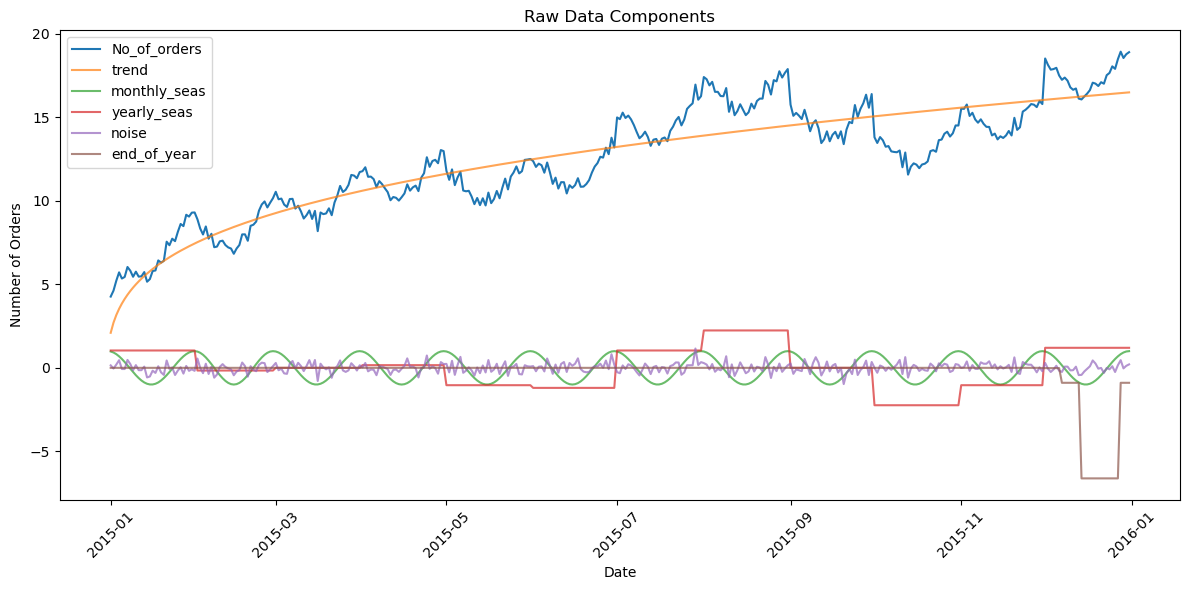

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x='ds', y='y', label='No_of_orders', data=hourly_orders_1, ax=ax)
sns.lineplot(x='ds', y='trend', label='trend', data=hourly_orders_1, alpha=0.7, ax=ax)
sns.lineplot(x='ds', y='monthly_seas', label='monthly_seas', data=hourly_orders_1, alpha=0.7, ax=ax)
sns.lineplot(x='ds', y='yearly_seas', label='yearly_seas', data=hourly_orders_1, alpha=0.7, ax=ax)
sns.lineplot(x='ds', y='noise', label='noise', data=hourly_orders_1, alpha=0.7, ax=ax)
sns.lineplot(x='ds', y='end_of_year', label='end_of_year', data=hourly_orders_1, alpha=0.7, ax=ax)

ax.legend(loc='upper left')
ax.set(title='Raw Data Components', xlabel='Date', ylabel='Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
## Training the split

In [48]:
# Define threshold date.
threshold_date = pd.to_datetime('2015-08-01')
mask = hourly_orders_1['ds'] < threshold_date
# Split the data and select `ds` and `y` columns.
df_train = hourly_orders_1[mask][['ds', 'y']]
df_test = hourly_orders_1[~ mask][['ds', 'y']]

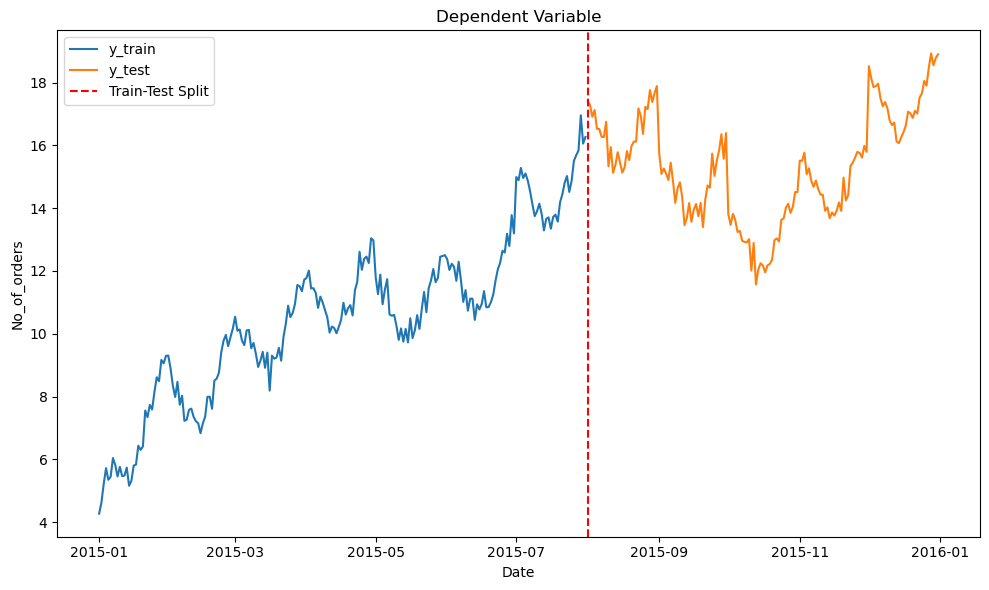

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='ds', y='y', label='y_train', data=df_train)
sns.lineplot(x='ds', y='y', label='y_test', data=df_test)

plt.axvline(threshold_date, color='r', linestyle='--', label='Train-Test Split')
plt.title('Dependent Variable')
plt.xlabel('Date')
plt.ylabel('No_of_orders')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [50]:
from prophet import Prophet

model = Prophet()
model.fit(df_train)
future = model.make_future_dataframe(periods=len(df_test), freq='H')  # Assuming hourly frequency
forecast = model.predict(future)
forecast_test = forecast[forecast['ds'] >= threshold_date]
actual = df_test['y'].values
predicted = forecast_test['yhat'].values

from sklearn.metrics import mean_absolute_error, mean_squared_error

min_length = min(len(actual), len(predicted))

actual_trimmed = actual[:min_length]
predicted_trimmed = predicted[:min_length]

mae = mean_absolute_error(actual_trimmed, predicted_trimmed)
mse = mean_squared_error(actual_trimmed, predicted_trimmed)
rmse = mse ** 0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

14:41:21 - cmdstanpy - INFO - Chain [1] start processing
14:41:21 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1.433219045886789
MSE: 3.029413824825497
RMSE: 1.740521135989304


In [51]:
#Time series decomposition:  into trend seasonal and residual

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_obj = seasonal_decompose(
    x=df_train.set_index('ds'), 
    model='additive'
)

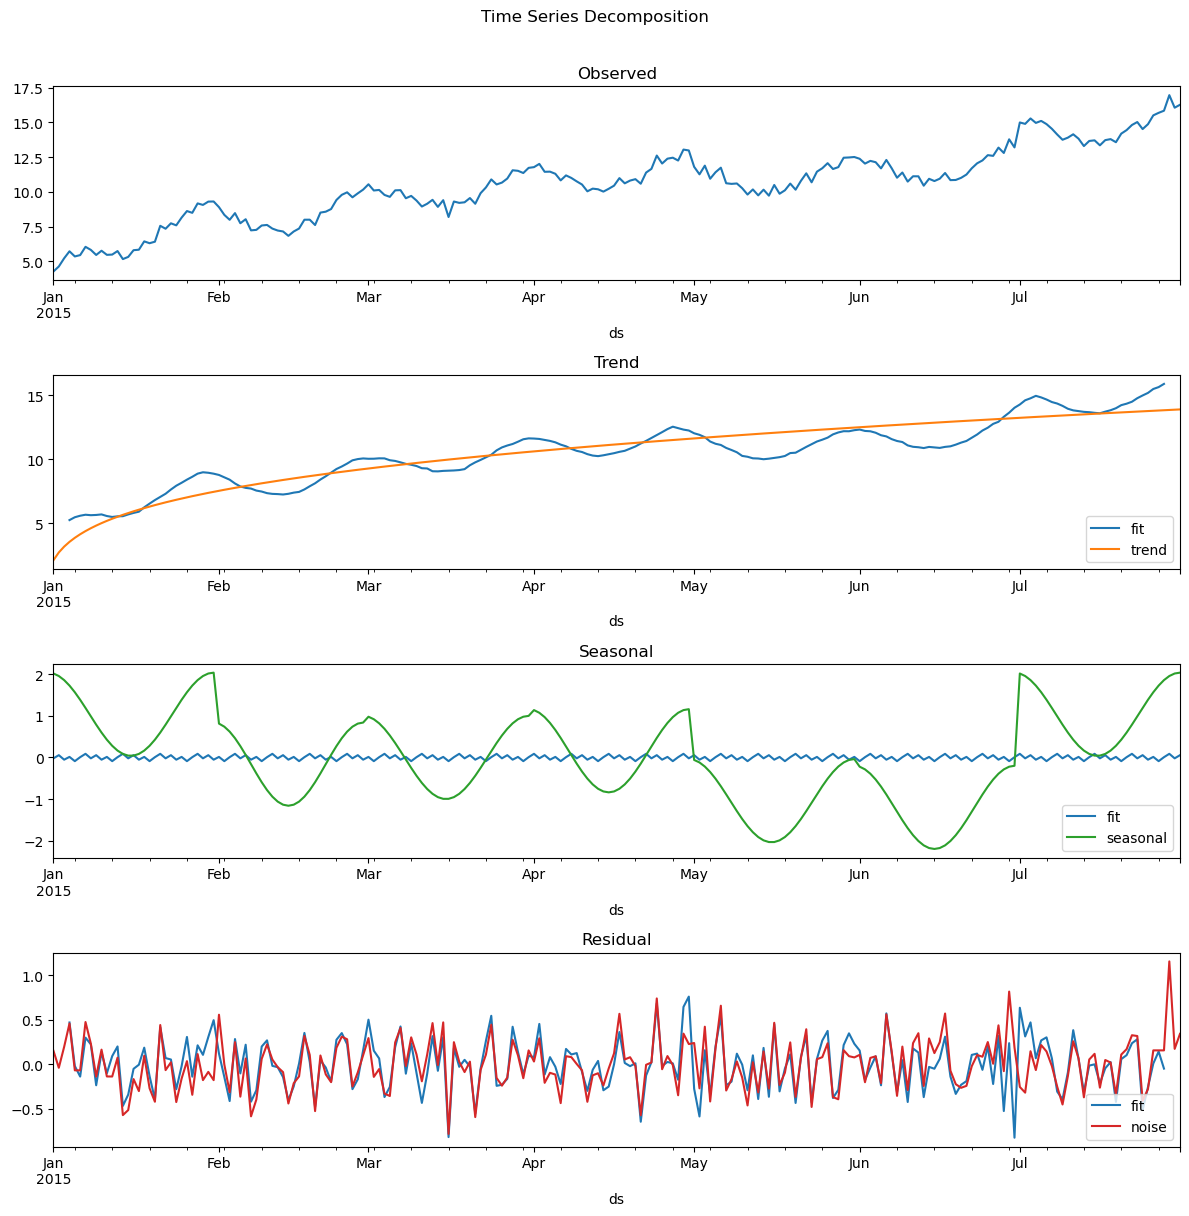

In [53]:

# Define the color palette
sns_c = sns.color_palette("tab10")

# Create the subplots
fig, ax = plt.subplots(4, 1, figsize=(12, 12))

# Plot observed time series
decomposition_obj.observed.plot(ax=ax[0])
ax[0].set(title='Observed')

# Plot trend component
decomposition_obj.trend.plot(label='fit', ax=ax[1])
hourly_orders_1[mask][['ds', 'trend']].set_index('ds').plot(color=sns_c[1], ax=ax[1])
ax[1].legend(loc='lower right')
ax[1].set(title='Trend')

# Plot seasonal component
decomposition_obj.seasonal.plot(label='fit', ax=ax[2])
hourly_orders_1.assign(seasonal=lambda x: x['yearly_seas'] + x['monthly_seas'] + x['end_of_year'])[mask][['ds', 'seasonal']].set_index('ds').plot(color=sns_c[2], ax=ax[2])
ax[2].legend(loc='lower right')
ax[2].set(title='Seasonal')

# Plot residual component
decomposition_obj.resid.plot(label='fit', ax=ax[3])
hourly_orders_1[mask][['ds', 'noise']].set_index('ds').plot(color=sns_c[3], ax=ax[3])
ax[3].legend(loc='lower right')
ax[3].set(title='Residual')

# Set the supertitle and layout
fig.suptitle('Time Series Decomposition', y=1.01)
plt.tight_layout()
plt.show()